In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("Name.csv")
data.head()

,Unnamed: 0,PassengerId,t,Survived,Pclass,Name,Family members,Age,Ticket,Fare,female,male,C,Q,S
0,0,1,Mr,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1,0,0,1
1,1,2,Mrs,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,0,1,0,0
2,2,3,Miss,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,3,4,Mrs,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,1,0,0,0,1
4,4,5,Mr,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,1,0,0,1


### drop the name column 

In [4]:
data=data.drop('Name', 1)
data.head()

,Unnamed: 0,PassengerId,t,Survived,Pclass,Family members,Age,Ticket,Fare,female,male,C,Q,S
0,0,1,Mr,0,3,1,22.0,A/5 21171,7.2500,0,1,0,0,1
1,1,2,Mrs,1,1,1,38.0,PC 17599,71.2833,1,0,1,0,0
2,2,3,Miss,1,3,0,26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,3,4,Mrs,1,1,1,35.0,113803,53.1000,1,0,0,0,1
4,4,5,Mr,0,3,0,35.0,373450,8.0500,0,1,0,0,1


# Training set and Testing set Apply decision tree. 

In [5]:
X = data[['Pclass', 'Family members',
       'Age', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
y = data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2 , random_state=40)


In [6]:
classifier = tree.DecisionTreeClassifier('gini','best')
classifier.fit(X_train,y_train)
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.7597765363128491


# Apply logistic regression 

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print ('accuracy = { :.2f}',format(logreg.score(X_test,y_test)))


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy = { :.2f} 0.8156424581005587


# Applay KNN

In [8]:
classifierr = KNeighborsClassifier(n_neighbors=3)
classifierr.fit(X_train, y_train)
print ('accuracy = { :.3f}',format(classifierr.score(X_test,y_test)))

accuracy = { :.3f} 0.7541899441340782


# Applay Voting classifier 

In [9]:
clf_voting = VotingClassifier(estimators=[('dt',classifier),('lg',logreg),('knn',classifierr)])

In [10]:
clf_voting.fit(X_train,y_train)
y_pred=clf_voting.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("accuracy = { :2.f}  ",format(acc))

accuracy = { :2.f}   0.8547486033519553


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
clf_voting.predict([[1,2,45,55.000,0,1,0,0,1]])

array([0], dtype=int64)

In [406]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       103
           1       0.83      0.83      0.83        76

   micro avg       0.85      0.85      0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



# Plot  decision tree

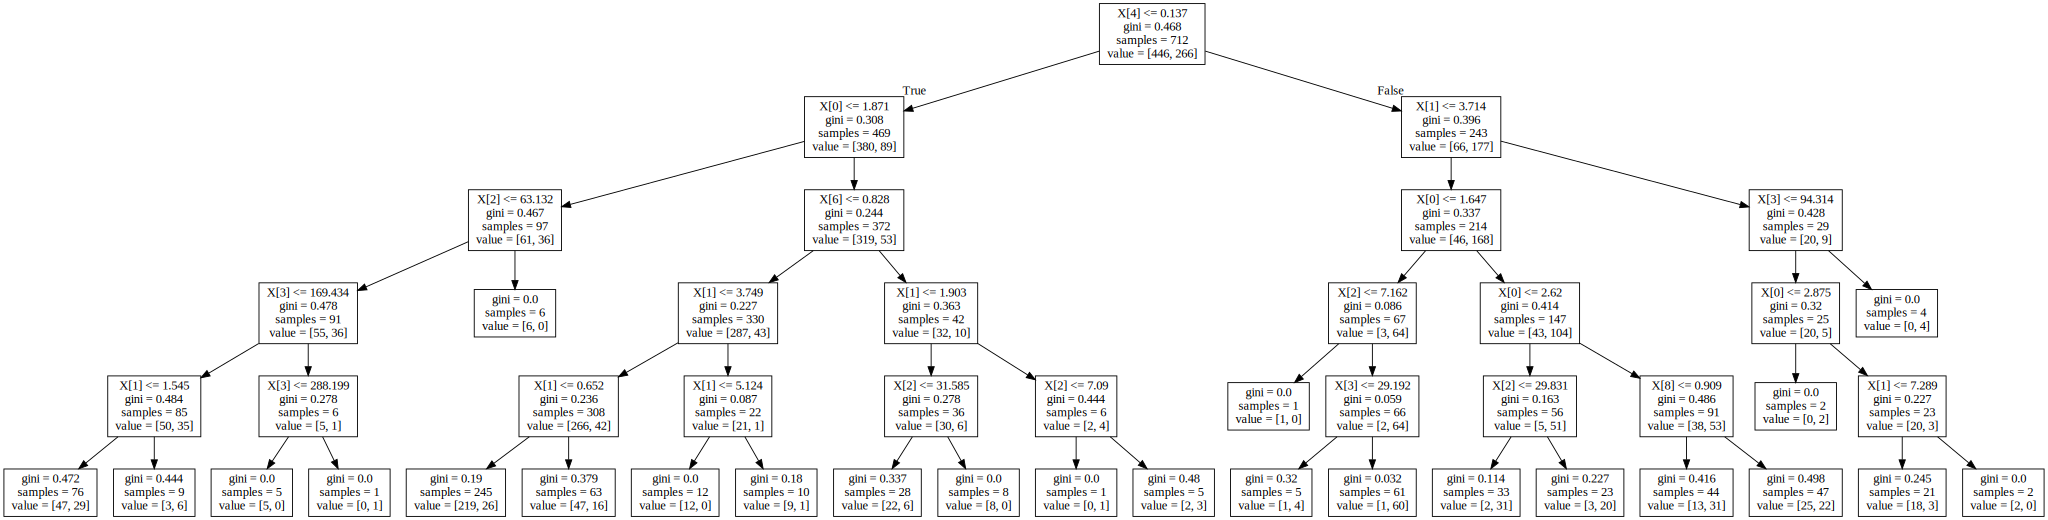

In [383]:
import graphviz 
data = tree.export_graphviz (classifier,out_file=None)
graph = graphviz.Source(data)
graph.render("data")
graph

In [391]:
classifier = tree.DecisionTreeClassifier('gini','random',max_depth=5)
classifier.fit(X_train,y_train)
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.8324022346368715


In [300]:
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.8379888268156425
